In [36]:
import json
import copy
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from geopy.distance import great_circle as  distance

In [37]:
def merge_lines(feature_collection):
    features = copy.deepcopy(feature_collection['features'])
    ordered_coords = [features.pop()['geometry']['coordinates']]
    while len(features) > 0:
        min_dist = 1.e6
        idx = 0
        reverse = False
        insert_idx = 0
        for i, feature in enumerate(features):
            coord_list = feature['geometry']['coordinates']
            front_feat = coord_list[0][::-1]
            back_feat = coord_list[-1][::-1]
            front_coords = ordered_coords[0][0][::-1]
            back_coords = ordered_coords[-1][-1][::-1]
            d1 = distance(front_coords, front_feat)
            d2 = distance(front_coords, back_feat)
            d3 = distance(back_coords, front_feat)
            d4 = distance(back_coords, back_feat)
            
            if d1 < min_dist:
                min_dist = d1
                idx = i
                insert_idx = 0
                reverse = True

            if d2 < min_dist:
                min_dist = d2
                idx = i
                insert_idx = 0
                reverse = False

            if d3 < min_dist:
                min_dist = d3
                idx = i
                insert_idx = len(ordered_coords)
                reverse = False

            if d4 < min_dist:
                min_dist = d4
                idx = i
                insert_idx = len(ordered_coords)
                reverse = True

        feature = features.pop(idx)
        coords = feature['geometry']['coordinates']
        coords = coords[::-1] if reverse else coords
        ordered_coords.insert(insert_idx, coords)
    return [item for sublist in ordered_coords for item in sublist]


In [38]:
data = json.load(open('shapefiles/gold.geo.json'))
c = np.array(merge_lines(data))

In [39]:
d = np.zeros_like(c)

In [40]:
for i, point in enumerate(c):
    if i == 0:
        continue
    d[i] = distance(c[i-1][::-1], c[i][::-1]).km
    

In [41]:
cumulative_distance = np.cumsum(d)

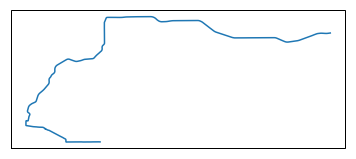

In [42]:
ax = plt.axes(projection=ccrs.Mercator())
plt.plot(c[:,0], c[:,1], transform=ccrs.PlateCarree())

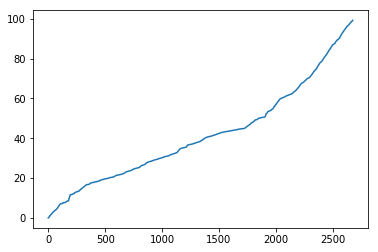

In [43]:
plt.plot(cumulative_distance)

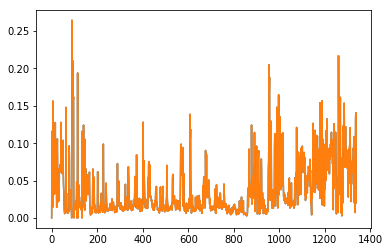

In [44]:
plt.plot(d)